In [124]:
import pandas as pd
import missingno as msn
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [98]:
train_split = pd.read_excel("train_first_part.xlsx")
train_second_part = pd.read_json("train_second_part.json")

In [10]:
train_split.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [11]:
train_second_part.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1179850,1,1/13/16 12:31,1/13/16 12:43,1,-73.983612,40.766380,-73.970161,40.756287,N,708
1,id1850980,1,6/3/16 20:48,6/3/16 20:59,1,-73.995712,40.724575,-73.983772,40.725628,N,629
2,id1370334,1,3/19/16 8:57,3/19/16 9:08,3,-73.983597,40.761227,-73.961403,40.779179,N,649
3,id2807307,1,1/31/16 15:49,1/31/16 15:51,2,-73.997971,40.745983,-73.994446,40.750683,N,132
4,id3800941,2,3/6/16 11:34,3/6/16 11:37,1,-73.960693,40.761459,-73.952812,40.769840,N,195


In [99]:
all_df = pd.concat([train_split, train_second_part])
all_df = all_df.reset_index()
all_df = all_df.drop(["index"], axis=1)

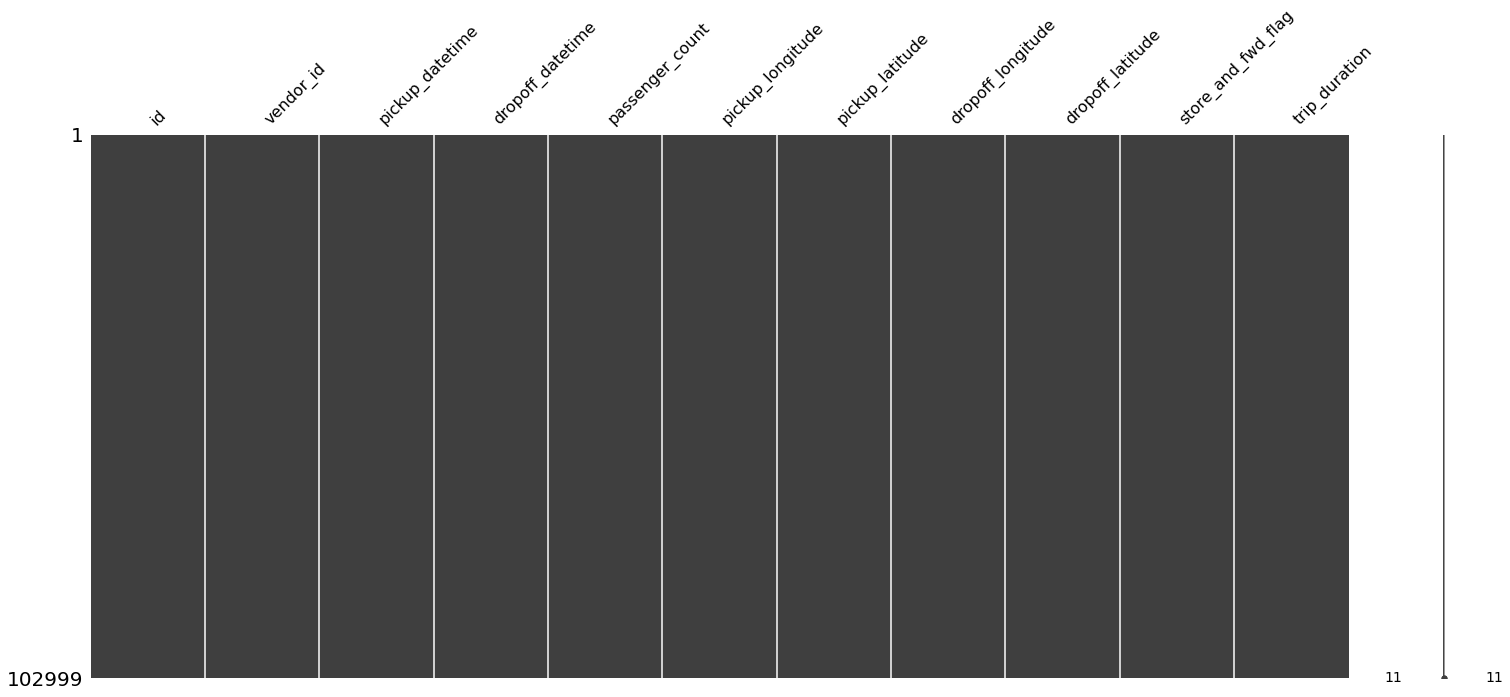

In [41]:
msn.matrix(all_df)

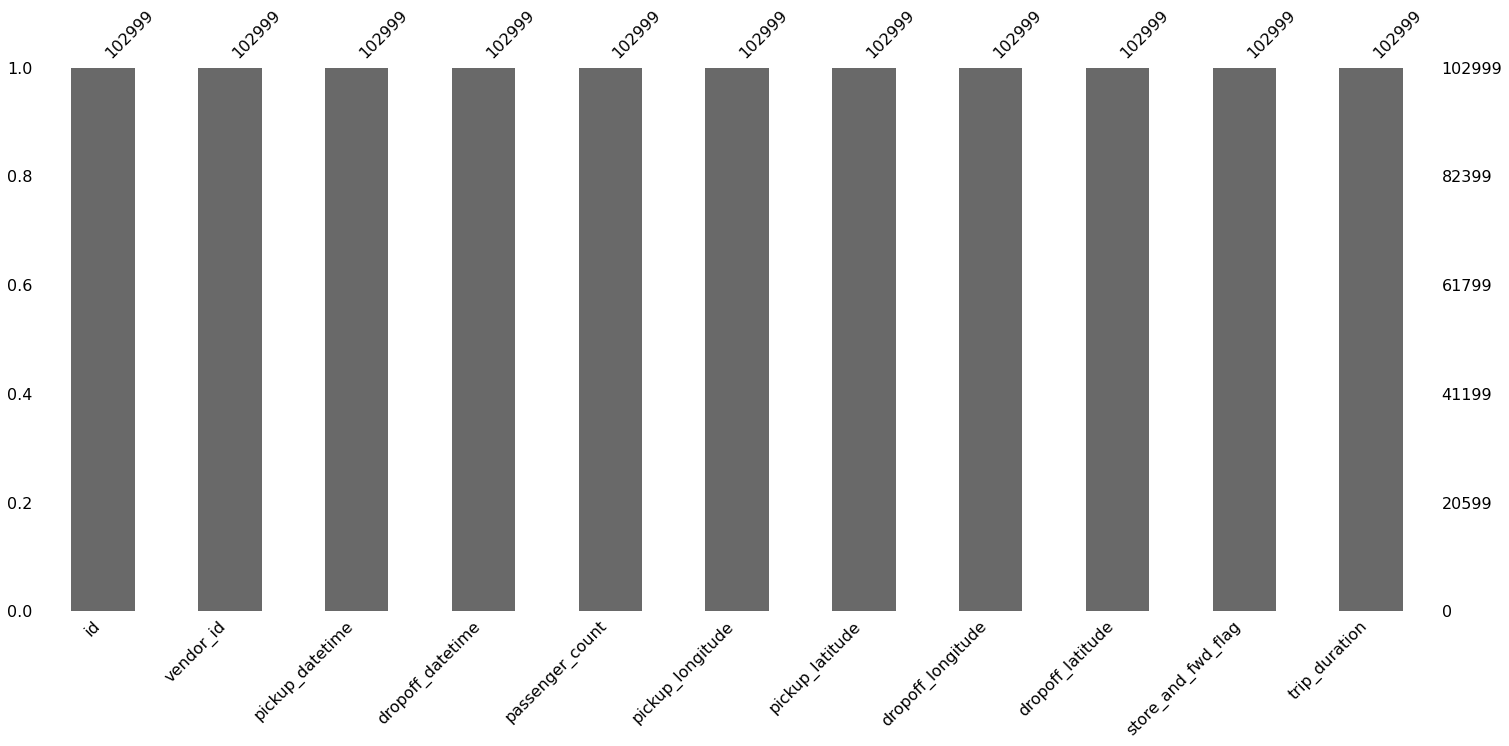

In [40]:
msn.bar(all_df)

In [105]:
all_df["pickup_datetime"] = pd.to_datetime(all_df["pickup_datetime"])
all_df["dropoff_datetime"] = pd.to_datetime(all_df["dropoff_datetime"])
all_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [100]:
weather_df = pd.read_csv("weather.csv")
weather_df.head()

,date,maximum temperature,minimum temperature,average temperature,precipitation,snow fall,snow depth
0,1-1-2016,42,34,38.0,0.00,0.0,0
1,2-1-2016,40,32,36.0,0.00,0.0,0
2,3-1-2016,45,35,40.0,0.00,0.0,0
3,4-1-2016,36,14,25.0,0.00,0.0,0
4,5-1-2016,29,11,20.0,0.00,0.0,0


In [101]:
weather_df["date"] = pd.to_datetime(weather_df["date"])
weather_df["date"] = weather_df["date"].dt.strftime("%m/%d/%Y")

In [106]:
%%time
all_df["maximum_temperature"] = all_df["pickup_datetime"].map(
    lambda x: weather_df.loc[weather_df["date"] == x.strftime("%m/%d/%Y")]["maximum temperature"].iloc[0])

all_df["minimum_temperature"] = all_df["pickup_datetime"].map(
    lambda x: weather_df.loc[weather_df["date"] == x.strftime("%m/%d/%Y")]["minimum temperature"].iloc[0])

all_df["average_temperature"] = all_df["pickup_datetime"].map(
    lambda x: weather_df.loc[weather_df["date"] == x.strftime("%m/%d/%Y")]["average temperature"].iloc[0])

all_df["precipitation"] = all_df["pickup_datetime"].map(
    lambda x: weather_df.loc[weather_df["date"] == x.strftime("%m/%d/%Y")]["precipitation"].iloc[0])

all_df["snow_fall"] = all_df["pickup_datetime"].map(
    lambda x: weather_df.loc[weather_df["date"] == x.strftime("%m/%d/%Y")]["snow fall"].iloc[0])

all_df["snow_depth"] = all_df["pickup_datetime"].map(
    lambda x: weather_df.loc[weather_df["date"] == x.strftime("%m/%d/%Y")]["snow depth"].iloc[0])

Wall time: 5min 42s


In [107]:
all_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,maximum_temperature,minimum_temperature,average_temperature,precipitation,snow_fall,snow_depth
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,51,40,45.5,0.29,0.0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,46,37,41.5,0.35,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,28,16,22.0,0.00,0.0,T
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,83,66,74.5,0.40,0.0,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,55,38,46.5,0.00,0.0,0


In [42]:
all_df["id"].value_counts()

id1156001    2
id0368607    2
id2880373    2
id2569132    2
id2540910    2
            ..
id3921491    1
id0227309    1
id3819690    1
id1464995    1
id3234672    1
Name: id, Length: 102721, dtype: int64

In [103]:
all_df = all_df.drop_duplicates(subset=["id"], keep='first')

In [71]:
all_df["id"].value_counts()

id1358177    1
id2855402    1
id2720258    1
id1418162    1
id3989300    1
            ..
id3046777    1
id3485913    1
id1233091    1
id0403476    1
id3234672    1
Name: id, Length: 102721, dtype: int64

In [121]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102721 entries, 0 to 102998
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   vendor_id            102721 non-null  int64         
 1   pickup_datetime      102721 non-null  datetime64[ns]
 2   dropoff_datetime     102721 non-null  datetime64[ns]
 3   passenger_count      102721 non-null  int64         
 4   pickup_longitude     102721 non-null  float64       
 5   pickup_latitude      102721 non-null  float64       
 6   dropoff_longitude    102721 non-null  float64       
 7   dropoff_latitude     102721 non-null  float64       
 8   store_and_fwd_flag   102721 non-null  object        
 9   trip_duration        102721 non-null  int64         
 10  maximum_temperature  102721 non-null  int64         
 11  minimum_temperature  102721 non-null  int64         
 12  average_temperature  102721 non-null  float64       
 13  precipitation 

In [108]:
print(all_df[all_df["precipitation"] == "T"]["precipitation"].value_counts())
print(all_df[all_df["snow_fall"] == "T"]["snow_fall"].value_counts())
print(all_df[all_df["snow_depth"] == "T"]["snow_depth"].value_counts())

T    7648
Name: precipitation, dtype: int64
T    3778
Name: snow_fall, dtype: int64
T    3211
Name: snow_depth, dtype: int64


In [113]:
all_df["precipitation"].replace("T", np.nan).isna().value_counts()

False    95073
True      7648
Name: precipitation, dtype: int64

In [114]:
columns = ["precipitation", "snow_fall", "snow_depth"]
for i in columns:
    all_df[i] = all_df[i].replace("T", np.nan)

In [118]:
all_df = all_df.drop(["id"], axis=1)

In [125]:
le = LabelEncoder()
all_df["store_and_fwd_flag"] = le.fit_transform(all_df["store_and_fwd_flag"])
all_df["store_and_fwd_flag"]

0         0
1         0
2         0
3         0
4         0
         ..
102994    0
102995    0
102996    0
102997    0
102998    0
Name: store_and_fwd_flag, Length: 102721, dtype: int32

In [131]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102721 entries, 0 to 102998
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   vendor_id            102721 non-null  int64         
 1   pickup_datetime      102721 non-null  datetime64[ns]
 2   dropoff_datetime     102721 non-null  datetime64[ns]
 3   passenger_count      102721 non-null  int64         
 4   pickup_longitude     102721 non-null  float64       
 5   pickup_latitude      102721 non-null  float64       
 6   dropoff_longitude    102721 non-null  float64       
 7   dropoff_latitude     102721 non-null  float64       
 8   store_and_fwd_flag   102721 non-null  int32         
 9   trip_duration        102721 non-null  int64         
 10  maximum_temperature  102721 non-null  int64         
 11  minimum_temperature  102721 non-null  int64         
 12  average_temperature  102721 non-null  float64       
 13  precipitation 

In [127]:
for i in columns:
    all_df[i] = all_df[i].astype("float64")

In [132]:
for i in columns:
    imp = IterativeImputer(ExtraTreesRegressor(random_state=42, n_jobs=-1, n_estimators=150), random_state=42)
    new_df = imp.fit_transform(all_df.drop(["pickup_datetime", "dropoff_datetime"], axis=1))

In [ ]:
all_df["precipitation"]